In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats, integrate
import matplotlib.pyplot as plt 

In [3]:
pwd

'C:\\Users\\bhanu\\Data Science Daily\\Tennis Analysis'

In [5]:
atp_data = pd.read_csv('matches_data_frame.csv')

In [6]:
atp_data.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,92298.000000,9.229800e+04,92298.000000,92298.000000,37412.000000,87574.000000,92201.000000,89303.000000,89303.000000,92298.000000,...,79400.000000,79400.000000,79400.000000,79400.000000,79400.000000,79400.000000,79400.000000,79400.000000,79400.000000,79400.000000
mean,52.438135,2.002771e+07,37.892089,103223.263050,6.756923,185.284457,25.536118,81.925859,1334.962476,103349.497985,...,5.189912,4.723514,3.513363,80.643438,47.593741,31.556776,15.015264,12.059433,4.811637,8.770202
std,37.634610,8.006136e+04,58.203612,2339.778283,5.994650,6.615031,3.585824,136.413930,1671.968679,3172.259686,...,4.067147,4.564691,2.631017,29.494113,19.356080,14.406163,7.260910,4.164653,3.271508,4.123164
min,4.000000,1.990010e+07,1.000000,100284.000000,1.000000,160.000000,14.351814,1.000000,1.000000,100282.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000
25%,32.000000,1.996022e+07,8.000000,101900.000000,2.000000,180.000000,22.891170,18.000000,494.000000,101889.000000,...,2.000000,2.000000,2.000000,59.000000,34.000000,21.000000,10.000000,9.000000,2.000000,6.000000
50%,32.000000,2.002091e+07,20.000000,103033.000000,5.000000,185.000000,25.322382,46.000000,829.000000,103018.000000,...,4.000000,4.000000,3.000000,75.000000,44.000000,29.000000,14.000000,11.000000,4.000000,8.000000
75%,56.000000,2.010012e+07,37.000000,104259.000000,8.000000,190.000000,27.945243,90.000000,1500.000000,104269.000000,...,7.000000,7.000000,5.000000,96.000000,58.000000,39.000000,19.000000,15.000000,7.000000,11.000000
max,128.000000,2.017083e+07,319.000000,202382.000000,35.000000,208.000000,42.792608,2101.000000,16950.000000,207277.000000,...,34.000000,103.000000,26.000000,489.000000,328.000000,284.000000,101.000000,91.000000,28.000000,35.000000


In [7]:
atp_data.head(1)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1990-360,Casablanca,Clay,32,A,19900305,1,101649,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
atp_data.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')

In [14]:
select_columns = ['tourney_name','surface','draw_size','tourney_level','tourney_date','winner_seed','winner_ioc','winner_name','winner_age','winner_rank',
                 'loser_seed','loser_name','loser_ioc','loser_rank','loser_age','score','best_of','round','minutes','w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced']

In [15]:
atp_data_condense = atp_data[select_columns]

In [16]:
atp_data_condense.shape

(92298, 37)


###########################################################################################################

restructure data to look at a player level aggregation which shall help us conduct a more profound analysis
###########################################################################################################


In [17]:
atp_data_group = atp_data_condense.groupby(['winner_name','loser_name'])[['winner_seed','loser_seed','minutes','w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced']].mean()

In [22]:
atp_data_group.shape
atp_data_group = atp_data_group.reset_index()
atp_data_group.head(5)

,winner_name,loser_name,winner_seed,loser_seed,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,Aaron Krickstein,Alex Antonitsch,5.500000,NaN,84.000000,3.500000,2.000000,57.500000,29.0,18.000000,...,5.000000,4.5,4.000000,71.000000,41.000000,25.0,9.500000,9.500000,6.0,11.500000
1,Aaron Krickstein,Alex Obrien,NaN,NaN,152.000000,8.000000,4.000000,96.000000,54.0,43.000000,...,11.000000,7.5,7.000000,122.500000,70.500000,50.5,18.000000,14.500000,10.5,15.500000
2,Aaron Krickstein,Alexander Reichel,5.000000,NaN,67.000000,3.000000,1.000000,50.000000,33.0,28.000000,...,3.000000,5.0,7.000000,56.000000,32.000000,16.0,11.000000,8.000000,3.0,7.000000
3,Aaron Krickstein,Alexander Volkov,4.500000,5.0,124.600000,7.200000,2.400000,99.200000,57.4,41.000000,...,8.400000,8.2,3.200000,105.000000,56.600000,37.0,22.000000,15.000000,9.4,14.600000
4,Aaron Krickstein,Amos Mansdorf,9.333333,14.0,94.333333,2.333333,1.666667,75.333333,42.0,29.333333,...,8.666667,3.0,3.666667,81.333333,50.333333,31.0,9.666667,11.666667,8.0,13.666667


In [28]:
atp_data_group = atp_data_group.fillna(0)

In [29]:
atp_data_group.describe()

,winner_seed,loser_seed,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,...,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000,61795.000000
mean,2.790849,1.871923,83.815794,5.303228,2.370098,65.948354,39.961410,30.017692,14.221571,10.354357,...,4.445865,3.921195,3.042431,68.268090,40.294059,26.643881,12.689281,10.196018,4.085781,7.460903
std,5.060484,4.504635,49.905157,5.016023,2.286214,37.540600,23.516494,17.268336,8.500016,5.623087,...,3.953016,4.218267,2.647273,38.224913,23.694680,16.613060,8.190906,5.578558,3.254242,4.712333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,0.000000
25%,0.000000,0.000000,62.000000,1.333333,0.666667,49.500000,29.000000,23.000000,10.000000,8.500000,...,1.000000,1.000000,1.000000,53.000000,29.000000,17.500000,8.000000,8.000000,2.000000,5.000000
50%,0.000000,0.000000,88.000000,4.000000,2.000000,68.000000,41.000000,31.000000,15.000000,11.000000,...,4.000000,3.000000,3.000000,71.000000,41.000000,27.000000,13.000000,10.500000,4.000000,7.750000
75%,4.000000,0.000000,114.000000,8.000000,3.500000,88.000000,53.500000,40.000000,19.000000,14.000000,...,7.000000,6.000000,4.333333,91.000000,54.000000,36.000000,18.000000,14.000000,6.000000,10.000000
max,35.000000,35.000000,987.000000,75.000000,22.000000,240.000000,194.000000,148.000000,61.000000,42.000000,...,30.000000,56.000000,23.000000,253.000000,196.000000,145.000000,66.000000,41.000000,25.000000,33.000000


# Visualization

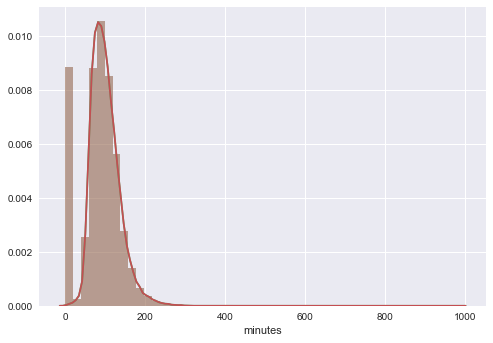

In [31]:
sns.distplot(atp_data_group['minutes'])
plt.show()

In [38]:
atp_data_group['winner_name'][0]

'Aaron Krickstein'

For Individual Players

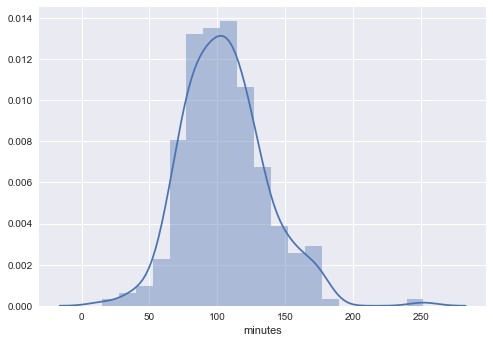

In [48]:
#For Rafael Nadal
sns.distplot(atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Rafael Nadal').fillna(0)) > 0 ] ['minutes'])
plt.show()

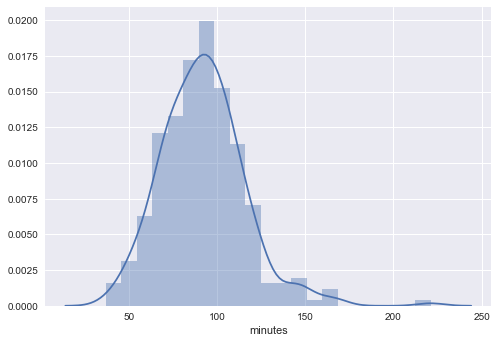

In [49]:
#For Roger Federer
sns.distplot(atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Roger Federer').fillna(0)) > 0 ] ['minutes'])
plt.show()

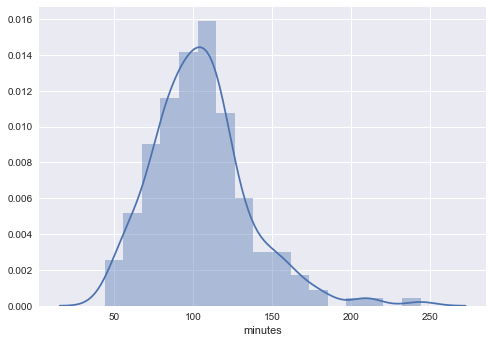

In [50]:
#For Novak Djokovic
sns.distplot(atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Novak Djokovic').fillna(0)) > 0 ] ['minutes'])
plt.show()

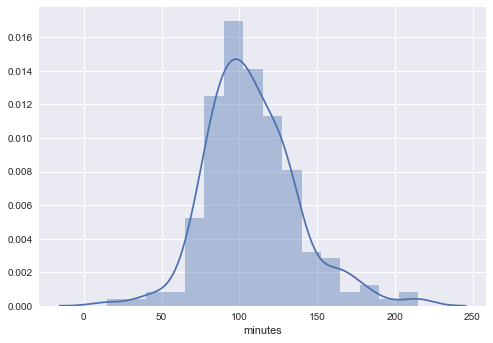

In [53]:
#For Andy Murray
sns.distplot(atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Andy Murray').fillna(0)) > 0 ] ['minutes'])
plt.show()


In [109]:
murray_win = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Andy Murray').fillna(0)) > 0 ]
nadal_win = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Rafael Nadal').fillna(0)) > 0 ]
federer_win = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Roger Federer').fillna(0)) > 0 ]
djokovic_win = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['winner_name']=='Novak Djokovic').fillna(0)) > 0 ]


In [110]:
big_four_win = pd.concat([murray,nadal,federer,djokovic])
big_four_win = big_four_win.drop(['loser_name'],axis=1)
big_four_condense_win = big_four_win.melt(['winner_name'],var_name='cols',value_name='vals')

In [113]:
sns.distplot(big_four_win['winner_seed'])

#g = sns.FacetGrid(big_four_condense, col='cols', hue="winner_name", palette="Set1")
#g = (g.map(sns.distplot, "vals", hist=False, rug=True))

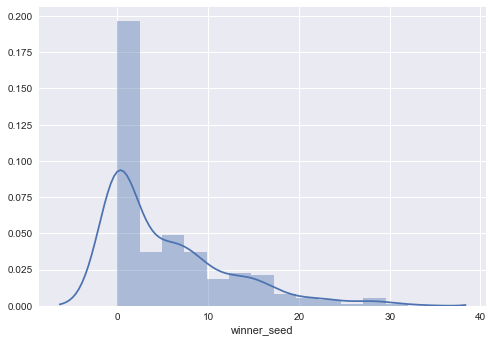

In [114]:
plt.show()

In [101]:
def big_four_plot_function(variable):
    
    sns.distplot(murray_win[[variable]], hist=False, rug=True,label='murray',axlabel=variable)
    sns.distplot(djokovic_win[[variable]], hist=False, rug=True,label='djokovic')
    sns.distplot(nadal_win[[variable]], hist=False, rug=True,label='nadal')
    sns.distplot(federer_win[[variable]], hist=False, rug=True,label='federer')
    plt.legend()
    sns.plt.show()

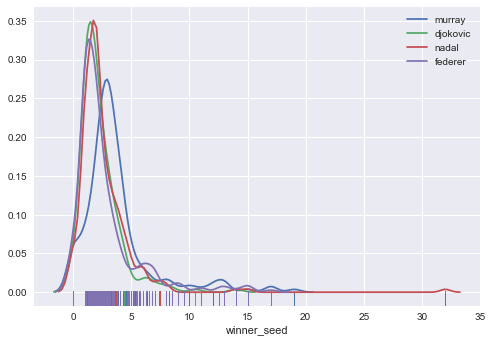

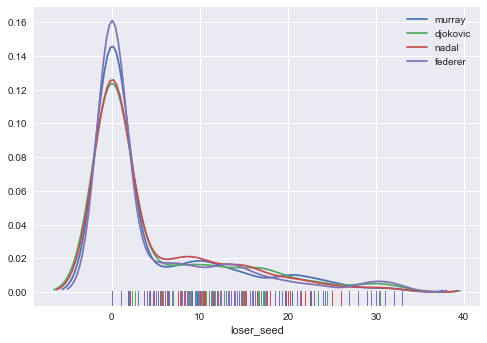

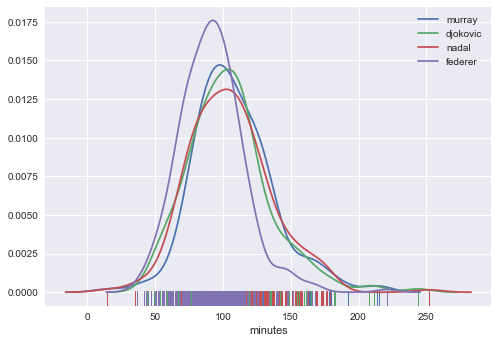

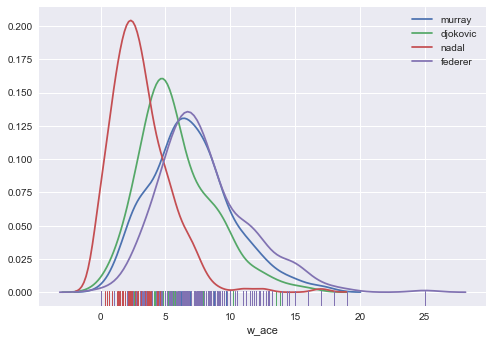

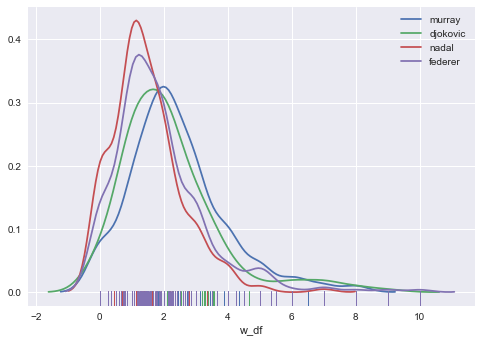

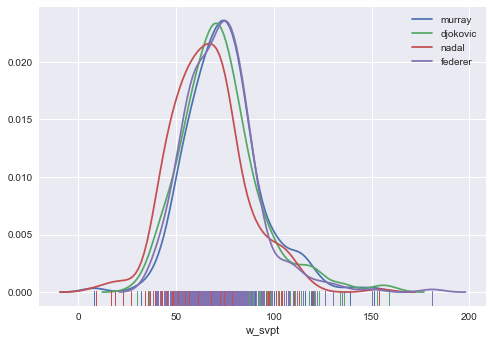

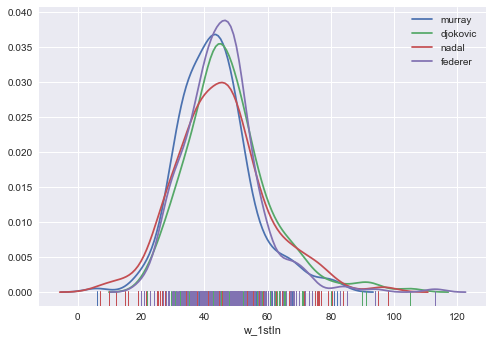

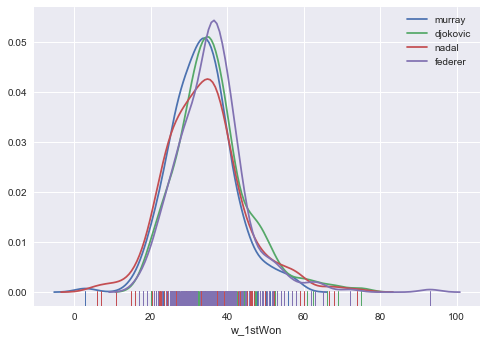

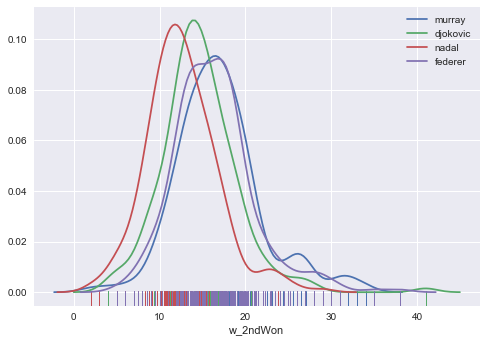

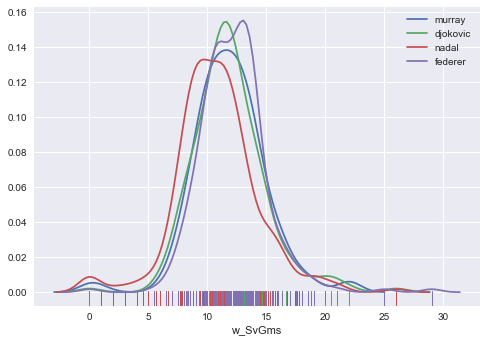

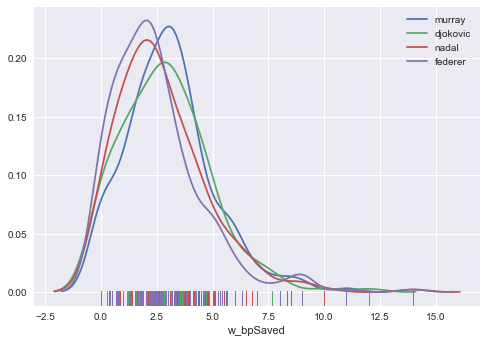

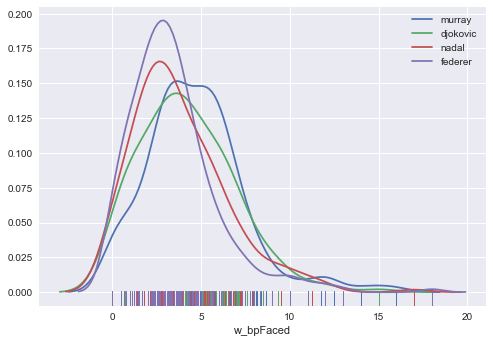

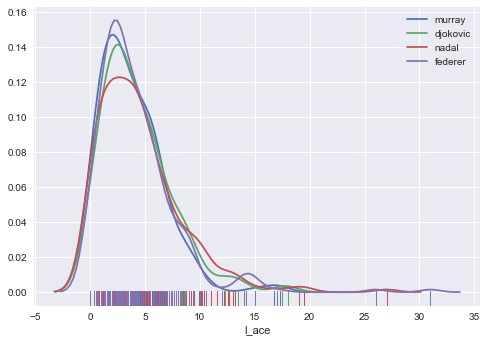

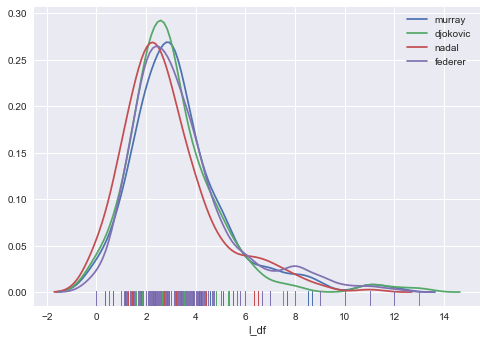

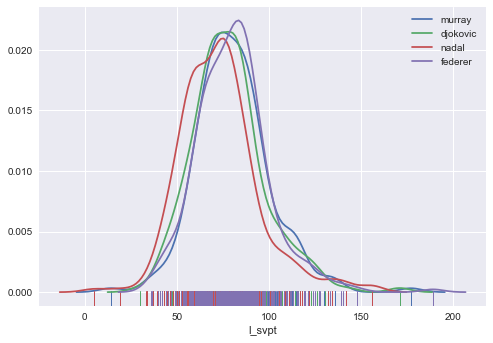

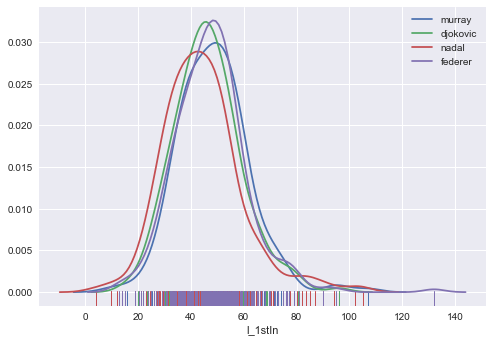

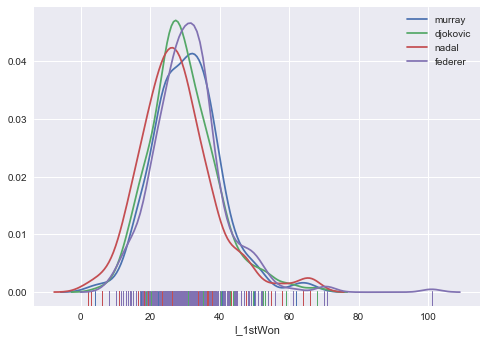

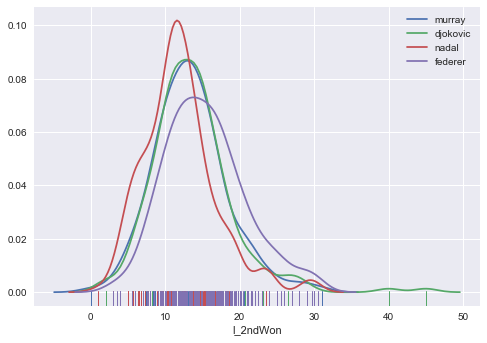

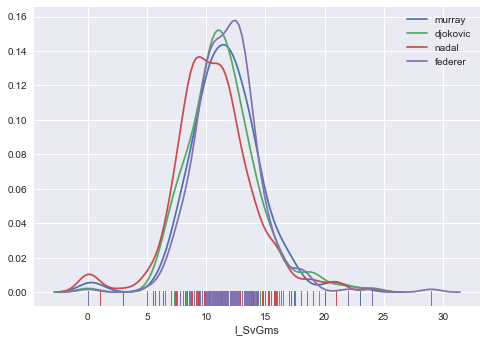

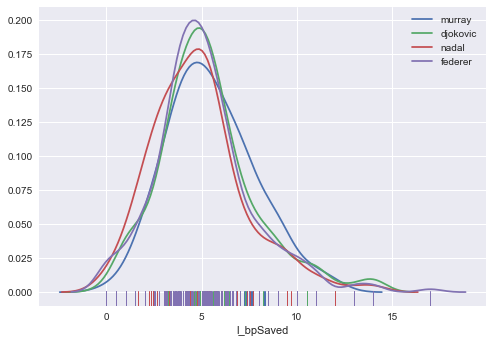

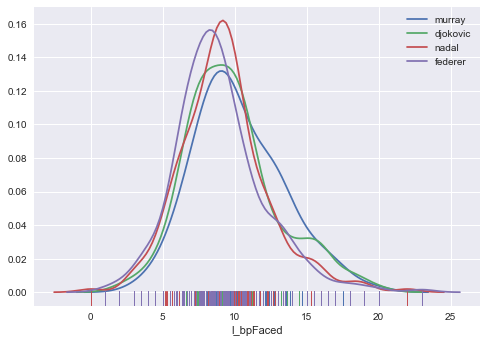

In [102]:
for a in big_four_condense['cols'].unique():
    big_four_plot_function(a)

In [108]:
## same analysis for their losses

murray_loss = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['loser_name']=='Andy Murray').fillna(0)) > 0 ]
nadal_loss = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['loser_name']=='Rafael Nadal').fillna(0)) > 0 ]
federer_loss = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['loser_name']=='Roger Federer').fillna(0)) > 0 ]
djokovic_loss = atp_data_group[(atp_data_group['minutes'].where(atp_data_group['loser_name']=='Novak Djokovic').fillna(0)) > 0 ]

big_four_loss = pd.concat([murray,nadal,federer,djokovic])
big_four_loss = big_four_loss.drop(['loser_name'],axis=1)
big_four_condense_loss = big_four_loss.melt(['winner_name'],var_name='cols',value_name='vals')

def big_four_plot_function2(variable):
    
    sns.distplot(murray_loss[[variable]], hist=False, rug=True,label='murray',axlabel=variable)
    sns.distplot(djokovic_loss[[variable]], hist=False, rug=True,label='djokovic')
    sns.distplot(nadal_loss[[variable]], hist=False, rug=True,label='nadal')
    sns.distplot(federer_loss[[variable]], hist=False, rug=True,label='federer')
    plt.legend()
    sns.plt.show()


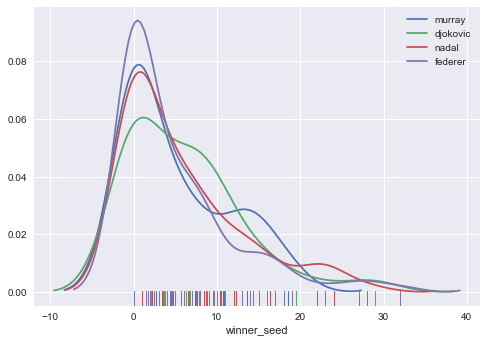

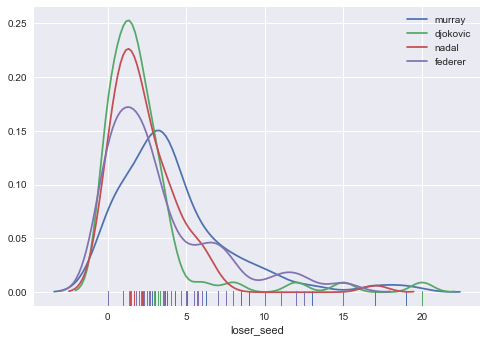

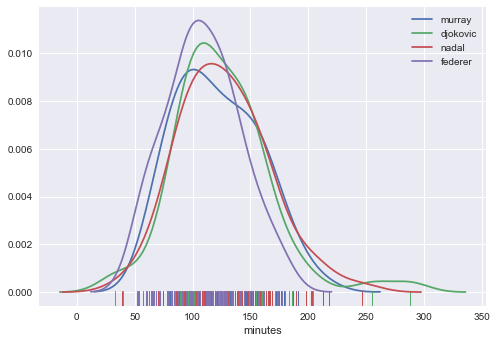

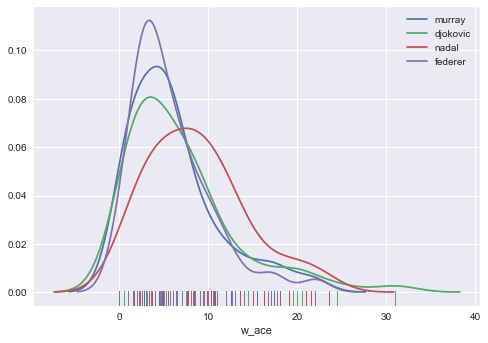

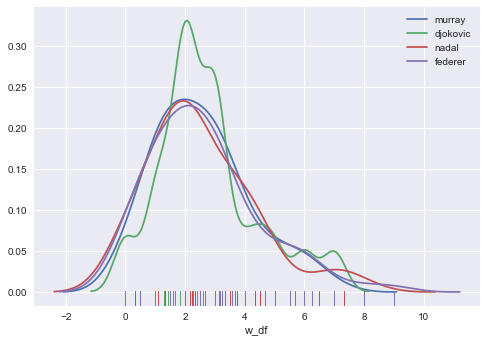

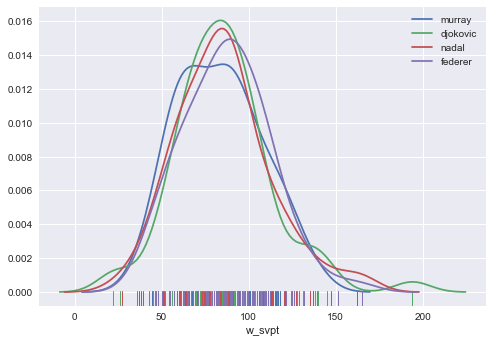

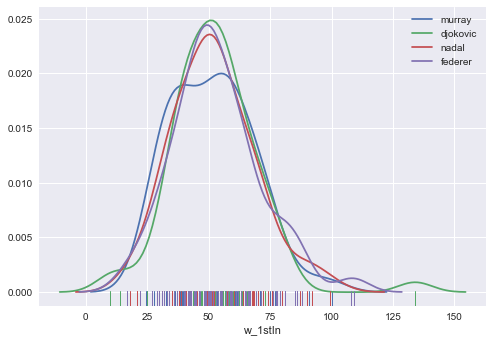

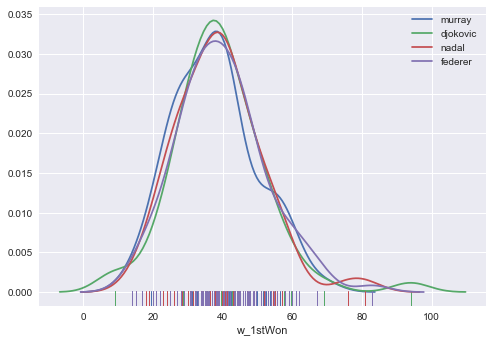

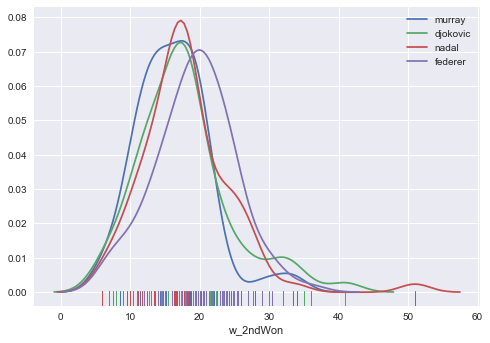

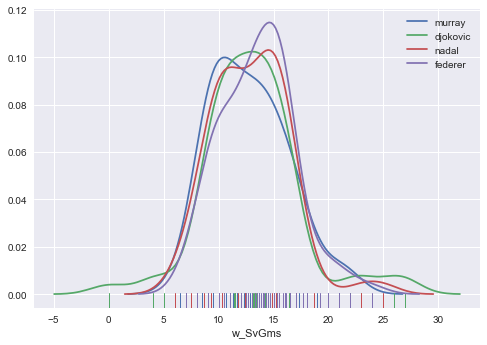

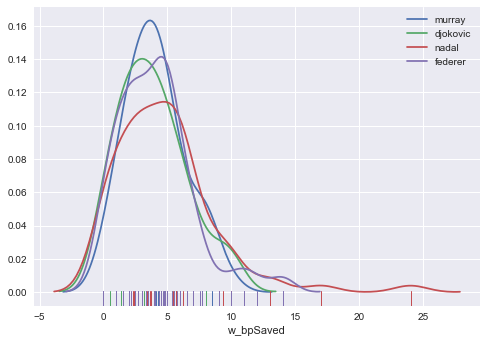

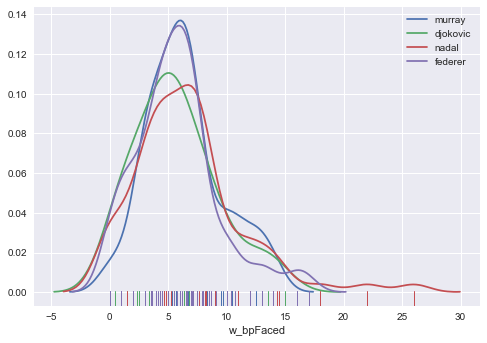

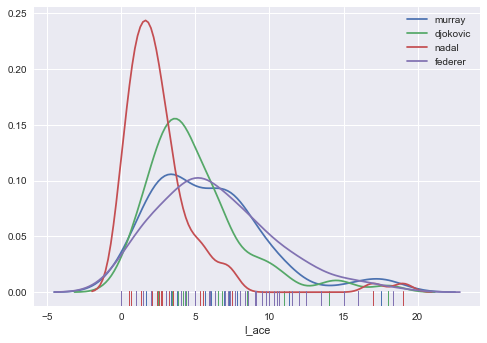

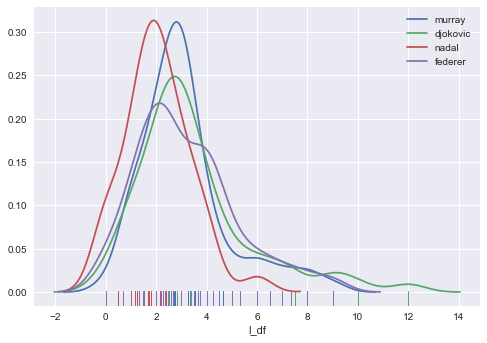

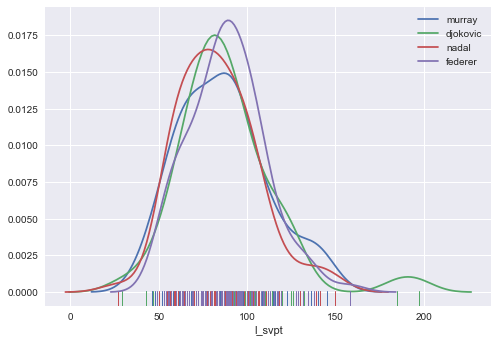

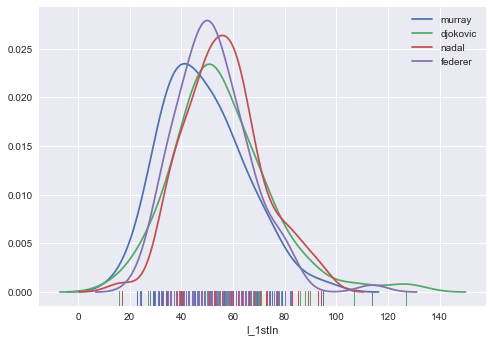

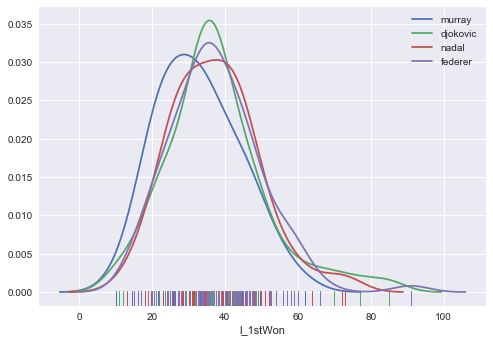

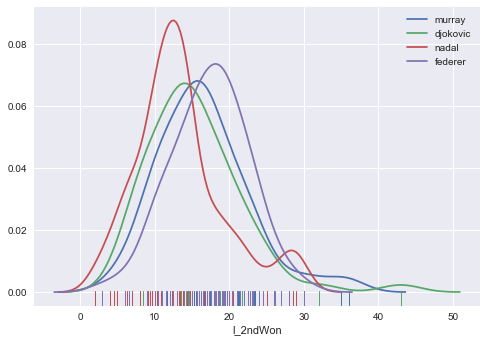

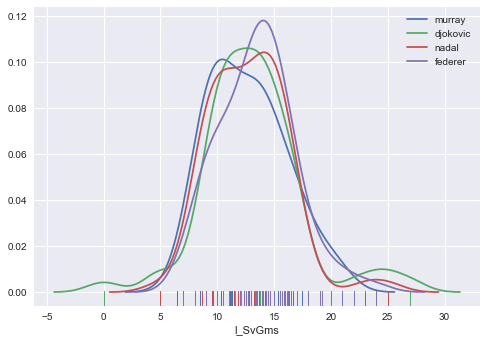

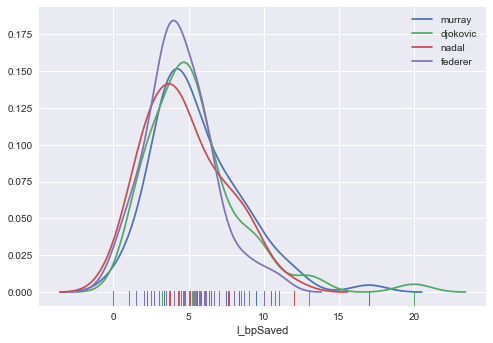

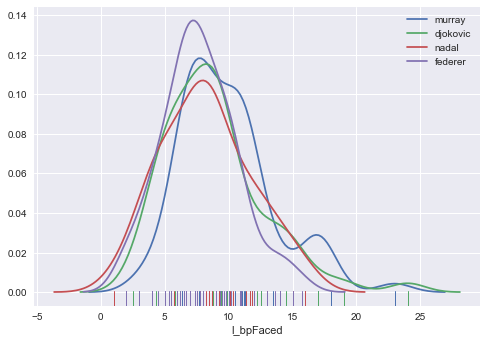

In [106]:
for a in big_four_condense_loss['cols'].unique():
    big_four_plot_function2(a)

In [124]:
#combine the two data sets
murray = murray_loss.append(murray_win)
print(murray_loss.shape)
print(murray_win.shape)
murray.shape

(70, 23)
(198, 23)


(268, 23)

In [127]:
djokovic = djokovic_loss.append(djokovic_win)
nadal = nadal_loss.append(nadal_win)
federer = federer_loss.append(federer_win)

#rerun similar graph analysis as earlier

In [128]:
murray

,winner_name,loser_name,winner_seed,loser_seed,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
1142,Albert Ramos,Andy Murray,15.000000,1.000000,152.000000,0.000000,3.000000,99.000000,68.000000,38.000000,...,12.000000,6.000000,2.000000,87.000000,52.000000,30.000000,13.000000,14.000000,7.000000,14.000000
1923,Alex Bogomolov Jr,Andy Murray,0.000000,5.000000,95.000000,0.000000,0.000000,50.000000,31.000000,17.000000,...,5.000000,3.000000,3.000000,62.000000,32.000000,17.000000,10.000000,10.000000,4.000000,11.000000
4008,Andreas Seppi,Andy Murray,0.000000,0.000000,130.000000,2.000000,2.000000,101.000000,58.000000,39.000000,...,5.000000,7.000000,5.000000,87.000000,53.000000,37.000000,14.000000,14.000000,7.000000,12.000000
5672,Andy Roddick,Andy Murray,4.750000,4.000000,124.666667,17.333333,1.333333,93.666667,66.666667,50.000000,...,4.666667,11.333333,3.666667,95.000000,46.333333,36.333333,24.000000,13.666667,5.000000,7.333333
5939,Antony Dupuis,Andy Murray,0.000000,0.000000,67.000000,5.000000,0.000000,59.000000,32.000000,23.000000,...,4.000000,3.000000,2.000000,43.000000,23.000000,15.000000,8.000000,8.000000,4.000000,7.000000
6195,Arnaud Clement,Andy Murray,11.000000,8.000000,172.000000,4.500000,3.000000,115.000000,61.500000,43.500000,...,6.500000,17.500000,8.000000,112.000000,59.000000,42.500000,23.500000,16.500000,8.500000,13.500000
7802,Borna Coric,Andy Murray,0.000000,2.000000,82.000000,1.500000,1.000000,45.000000,24.500000,19.500000,...,2.500000,3.000000,2.000000,59.500000,34.500000,22.000000,9.000000,8.500000,4.000000,8.000000
11489,David Ferrer,Andy Murray,7.600000,5.500000,138.833333,5.000000,2.666667,91.666667,60.666667,41.166667,...,8.500000,7.333333,1.166667,95.000000,49.000000,33.166667,19.666667,12.666667,6.666667,11.166667
11899,David Nalbandian,Andy Murray,13.000000,4.000000,148.500000,2.500000,2.000000,100.000000,65.000000,44.000000,...,10.500000,8.500000,6.000000,114.000000,55.000000,37.000000,22.500000,16.000000,9.500000,17.000000
13546,Dominic Thiem,Andy Murray,4.000000,1.000000,135.000000,6.000000,4.000000,71.000000,35.000000,25.000000,...,8.000000,1.000000,2.000000,96.000000,67.000000,36.000000,15.000000,14.000000,4.000000,10.000000


In [129]:
big_four_complete = djokovic.append(nadal)
big_four_complete = big_four_complete.append(federer)
big_four_complete = big_four_complete.append(murray)

In [130]:
big_four_complete.shape

(1245, 23)

In [132]:
big_four_complete['winner_pct_fserve'] = big_four_complete['w_1stWon'] / big_four_complete['w_1stIn']

big_four_complete.winner_pct_fserve.describe()

count    1245.000000
mean        0.768108
std         0.064587
min         0.500000
25%         0.727273
50%         0.767442
75%         0.807692
max         1.000000
Name: winner_pct_fserve, dtype: float64

In [136]:
#place win/loss flag for each of the big four

big_four_complete['win/loss/M'] = np.where(big_four_complete.loser_name=='Andy Murray','L','W')
big_four_complete['win/loss/N'] = np.where(big_four_complete.loser_name=='Rafael Nadal','L','W')
big_four_complete['win/loss/F'] = np.where(big_four_complete.loser_name=='Roger Federer','L','W')
big_four_complete['win/loss/D'] = np.where(big_four_complete.loser_name=='Novak Djokovic','L','W')

In [140]:
big_four_complete['win/loss'] = np.where(np.logical_or(np.logical_or(np.logical_or(big_four_complete['win/loss/M']=='L',big_four_complete['win/loss/N']=="L"),big_four_complete['win/loss/F']=="L"),big_four_complete['win/loss/D']=="L"),"L","W")

In [143]:
#plot
big_four_complete


,winner_name,loser_name,winner_seed,loser_seed,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_pct_fserve,win/loss/M,win/loss/N,win/loss/F,win/loss/D,win/loss
2820,Alexander Zverev,Novak Djokovic,16.000000,2.000000,81.000000,7.000000,2.000000,45.000000,32.000000,27.000000,...,9.000000,10.000000,2.000000,5.000000,0.843750,W,W,W,L,L
5580,Andy Murray,Novak Djokovic,3.636364,1.818182,130.700000,4.818182,1.818182,81.454545,48.818182,35.636364,...,14.000000,12.090909,5.272727,9.272727,0.729981,W,W,W,L,L
5830,Andy Roddick,Novak Djokovic,6.800000,3.000000,99.000000,9.400000,2.400000,65.400000,44.800000,37.000000,...,14.200000,11.600000,3.200000,6.200000,0.825893,W,W,W,L,L
5984,Antony Dupuis,Novak Djokovic,0.000000,0.000000,96.000000,2.000000,1.000000,68.000000,34.000000,23.000000,...,7.000000,11.000000,5.000000,10.000000,0.676471,W,W,W,L,L
6318,Arnaud Clement,Novak Djokovic,14.000000,4.000000,113.000000,2.000000,0.000000,91.000000,58.000000,47.000000,...,14.000000,13.000000,6.000000,8.000000,0.810345,W,W,W,L,L
9167,Carlos Moya,Novak Djokovic,0.000000,4.000000,111.000000,4.000000,3.000000,78.500000,43.000000,33.000000,...,10.500000,13.000000,4.000000,7.500000,0.767442,W,W,W,L,L
10972,Daniel Gimeno Traver,Novak Djokovic,0.000000,0.000000,133.000000,2.000000,5.000000,105.000000,70.000000,49.000000,...,12.000000,14.000000,3.000000,7.000000,0.700000,W,W,W,L,L
11655,David Ferrer,Novak Djokovic,9.000000,6.000000,110.250000,2.000000,2.250000,73.000000,43.500000,28.750000,...,12.000000,11.000000,4.500000,8.750000,0.660920,W,W,W,L,L
11817,David Goffin,Novak Djokovic,10.000000,2.000000,157.000000,3.000000,2.000000,100.000000,53.000000,32.000000,...,18.000000,15.000000,13.000000,17.000000,0.603774,W,W,W,L,L
12021,David Nalbandian,Novak Djokovic,0.000000,3.000000,105.000000,8.000000,0.000000,68.000000,41.000000,35.000000,...,16.000000,11.000000,4.000000,5.000000,0.853659,W,W,W,L,L


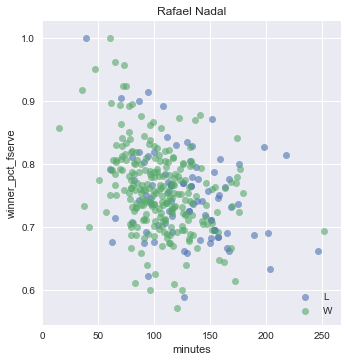

In [153]:
sns.lmplot( x="minutes", y="winner_pct_fserve",scatter_kws={'alpha':0.6}, data=big_four_complete[(big_four_complete.winner_name=="Rafael Nadal")|(big_four_complete.loser_name=="Rafael Nadal")], fit_reg=False, hue='win/loss', legend=False)

plt.legend(loc='lower right')

plt.title("Rafael Nadal")

plt.show()

In [160]:
def scatter_win_loss(player):

    sns.lmplot( x="minutes", y="winner_pct_fserve",scatter_kws={'alpha':0.6}, data=big_four_complete[(big_four_complete.winner_name==player)|(big_four_complete.loser_name==player)], fit_reg=False, hue='win/loss', legend=False)

    plt.legend(loc='lower right')

    plt.title(player)
    
    # control x and y limits
    sns.plt.ylim(0.4,1)
    sns.plt.xlim(0,300)


    plt.show()

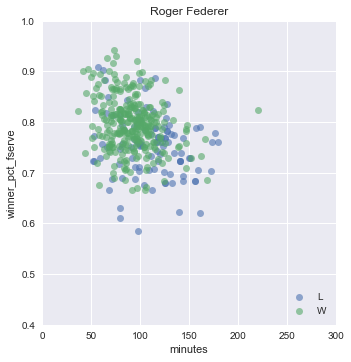

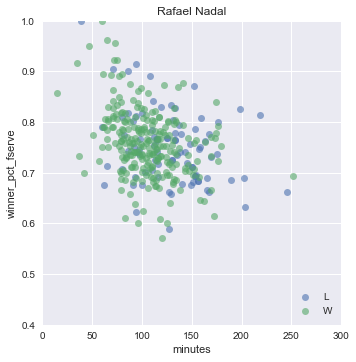

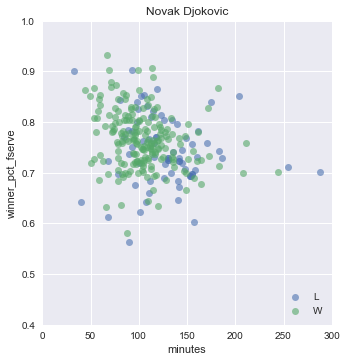

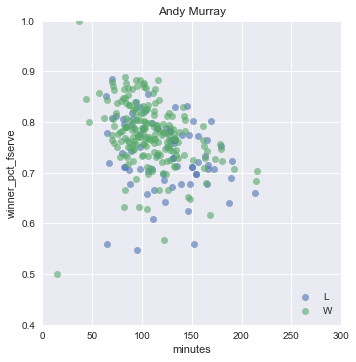

In [161]:
scatter_win_loss("Roger Federer")
scatter_win_loss("Rafael Nadal")
scatter_win_loss("Novak Djokovic")
scatter_win_loss("Andy Murray")